## a) loading `train.csv` from dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import dython

In [2]:

df = pd.read_csv("dataset/processed/train.csv")
df.head()


,id,m_num,p_num,time,bg-0:00,bg-0:15,bg-0:30,bg-0:45,bg-1:00,bg-1:15,...,hr-3:45,hr-4:00,hr-4:15,hr-4:30,hr-4:45,hr-5:00,hr-5:15,hr-5:30,hr-5:45,bg+1:00
0,p01_0,0,0,2000-09-18 06:10:00,15.1,16.2,17.3,17.5,17.3,18.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,13.4
1,p01_1,1,0,2000-09-18 06:25:00,14.4,15.1,16.2,17.3,17.5,17.3,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,12.8
2,p01_2,2,0,2000-09-18 06:40:00,13.9,14.4,15.1,16.2,17.3,17.5,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,15.5
3,p01_3,3,0,2000-09-18 06:55:00,13.8,13.9,14.4,15.1,16.2,17.3,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,14.8
4,p01_4,4,0,2000-09-18 07:10:00,13.4,13.8,13.9,14.4,15.1,16.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,12.7


# 1. Finding correlations

The aim of this exploration is finding the best column from each concept (bg-H:MM; insulin-H:MM, calories-H:MM and hr-H:MM) better correlate to the prediction for the blood glucose (bg+1:00)

## a) Correlation with insuline

In [5]:
columns = ["bg+1:00"]
columns.extend(sorted(filter(lambda x: "insulin" in x, df.columns)))
df_insuline = df[columns]

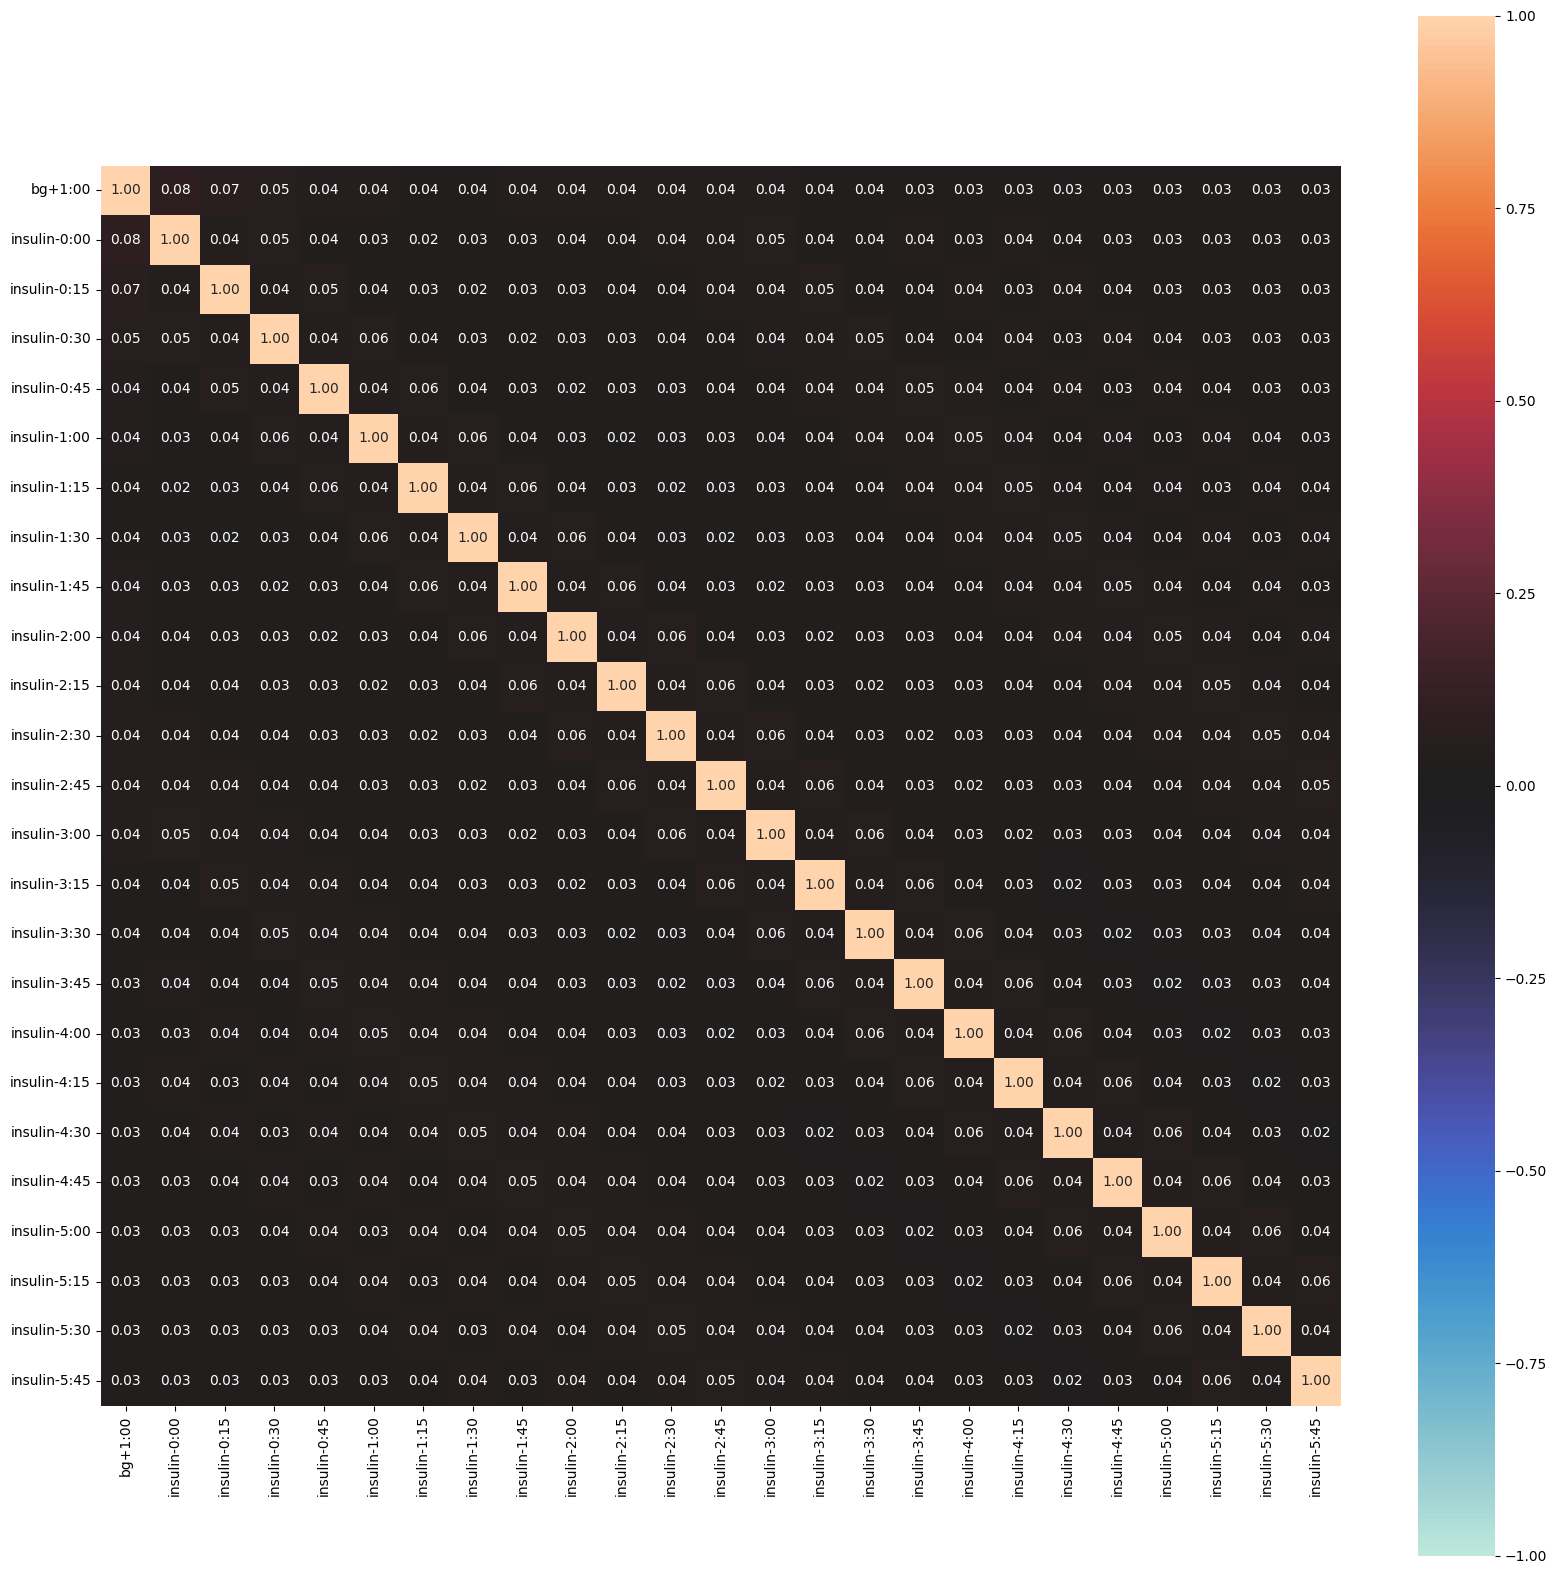

In [8]:
associations = dython.nominal.associations(df_insuline, figsize=(20,20))

<Axes: title={'center': 'bg+1:00 correlations'}>

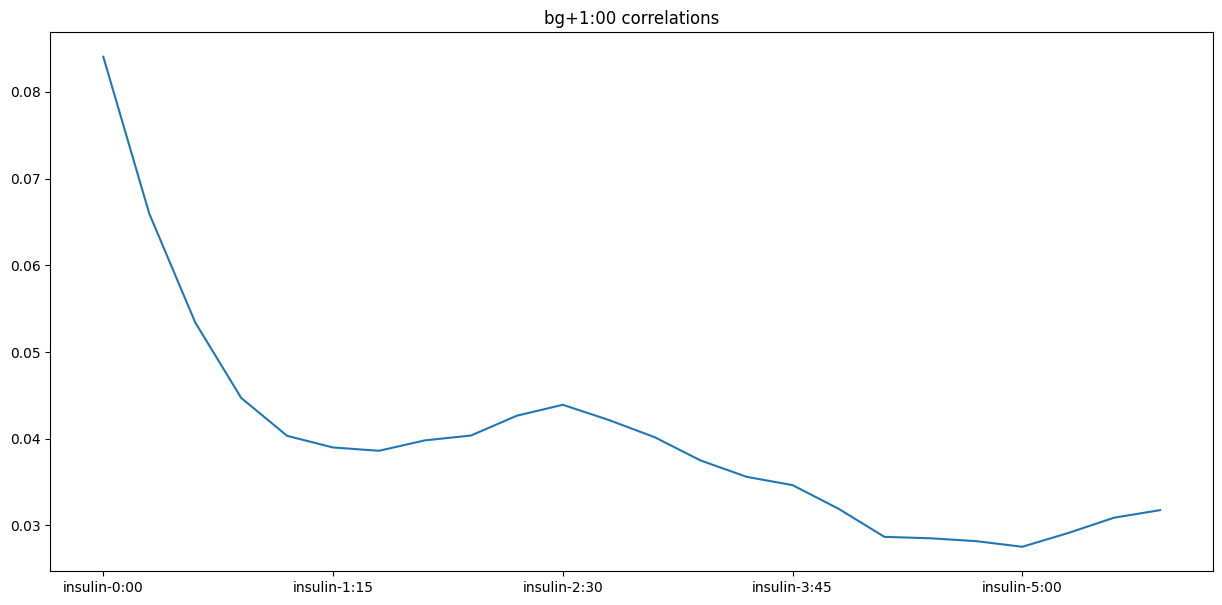

In [18]:
associations["corr"]["bg+1:00"][1:].plot(title="bg+1:00 correlations", figsize=(15,7))

As you can see, the most correlated is the first 1h (+1h) We will drop all other columns for not keeping too much data for the training

In [22]:
df.drop(columns=sorted(filter(lambda x: "insulin" in x, df.columns))[5:])

,id,m_num,p_num,time,bg-0:00,bg-0:15,bg-0:30,bg-0:45,bg-1:00,bg-1:15,...,hr-3:45,hr-4:00,hr-4:15,hr-4:30,hr-4:45,hr-5:00,hr-5:15,hr-5:30,hr-5:45,bg+1:00
0,p01_0,0,0,2000-09-18 06:10:00,15.1,16.2,17.3,17.5,17.3,18.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,13.4
1,p01_1,1,0,2000-09-18 06:25:00,14.4,15.1,16.2,17.3,17.5,17.3,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,12.8
2,p01_2,2,0,2000-09-18 06:40:00,13.9,14.4,15.1,16.2,17.3,17.5,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,15.5
3,p01_3,3,0,2000-09-18 06:55:00,13.8,13.9,14.4,15.1,16.2,17.3,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,14.8
4,p01_4,4,0,2000-09-18 07:10:00,13.4,13.8,13.9,14.4,15.1,16.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177019,p12_25294,25294,8,2000-12-18 23:35:00,9.8,8.9,8.2,6.9,6.1,6.4,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,11.1
177020,p12_25295,25295,8,2000-12-18 23:40:00,10.3,9.3,8.7,7.5,6.3,6.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10.9
177021,p12_25296,25296,8,2000-12-18 23:45:00,10.7,9.7,8.6,7.9,6.5,6.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10.7
177022,p12_25297,25297,8,2000-12-18 23:50:00,11.0,9.8,8.9,8.2,6.9,6.1,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10.5


## b) Correlation with calory consumption

In [23]:
columns = ["bg+1:00"]
columns.extend(sorted(filter(lambda x: "cal" in x, df.columns)))
df_insuline = df[columns]

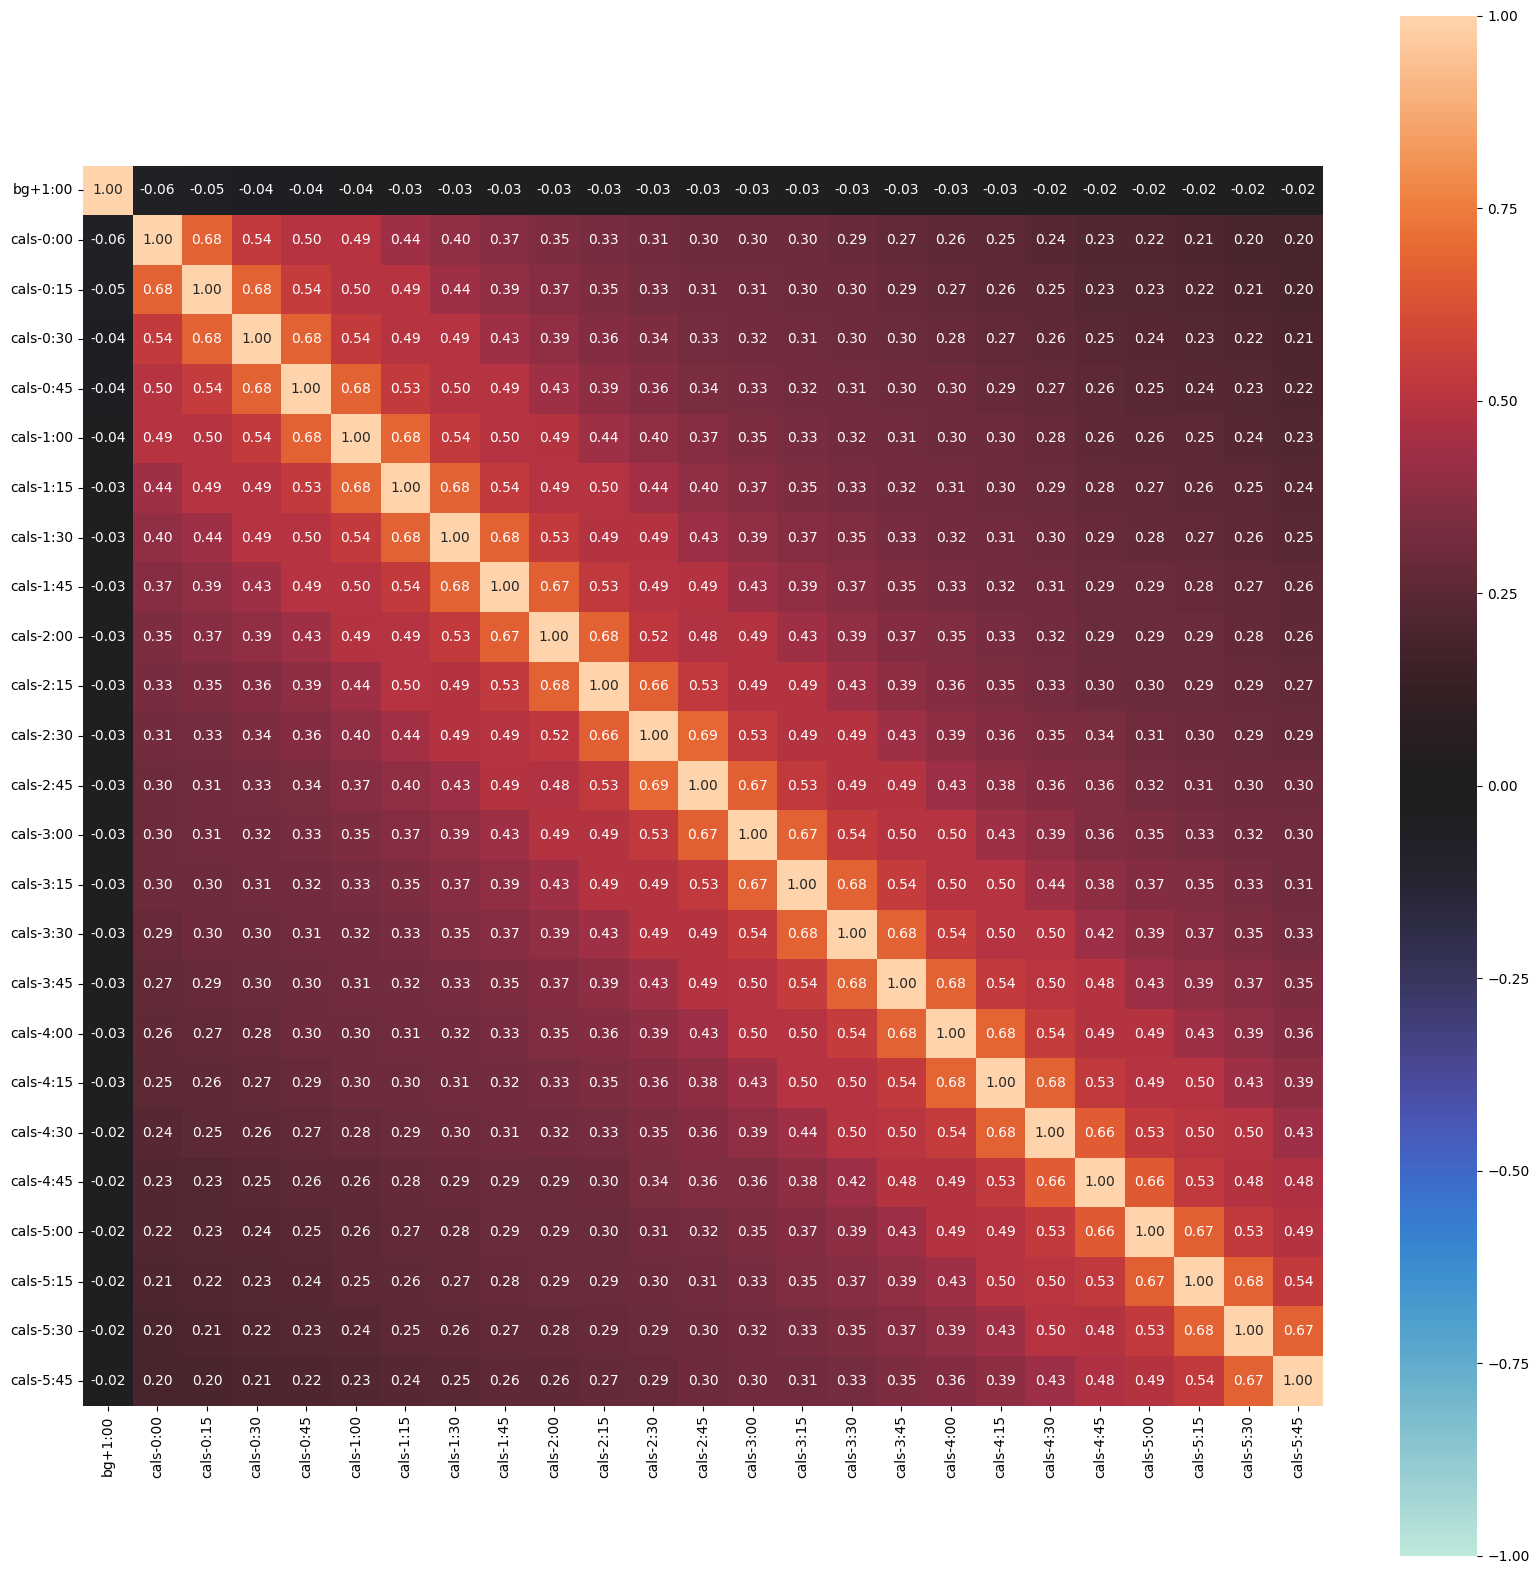

In [24]:
associations = dython.nominal.associations(df_insuline, figsize=(20,20))

<Axes: title={'center': 'bg+1:00 correlations'}>

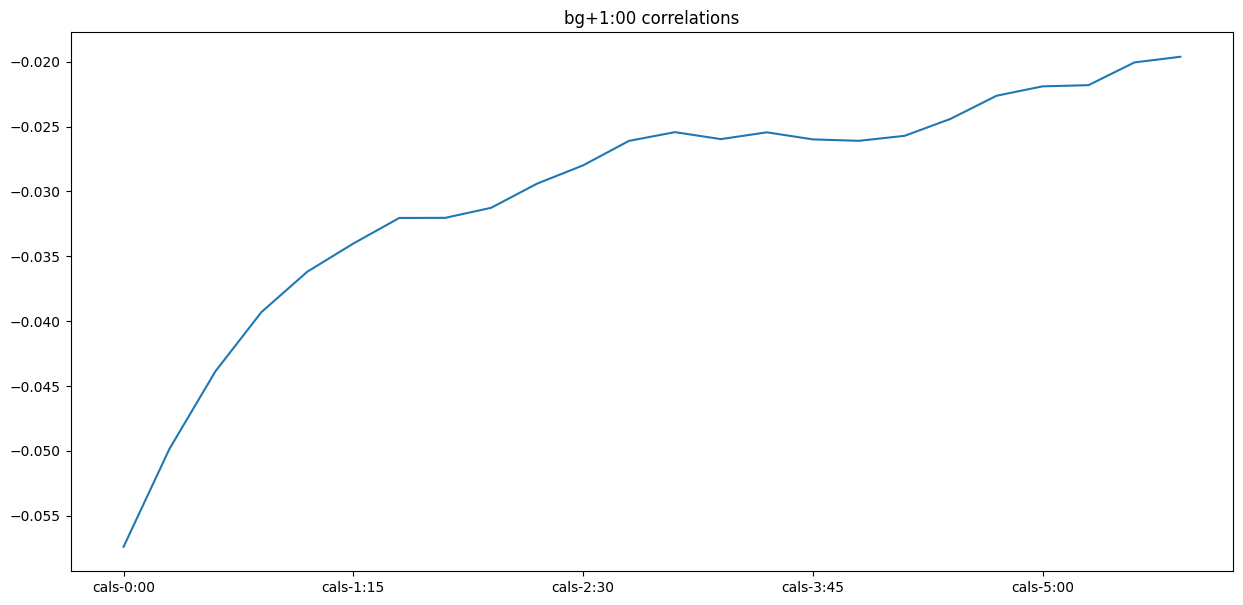

In [25]:
associations["corr"]["bg+1:00"][1:].abs().plot(title="bg+1:00 correlations", figsize=(15,7))

As you can see, the most correlated is the first 1:30h (+1h) We will drop all other columns for not keeping too much data for the training

In [31]:
df.drop(columns=sorted(filter(lambda x: "cals" in x, df.columns))[7:])

,id,m_num,p_num,time,bg-0:00,bg-0:15,bg-0:30,bg-0:45,bg-1:00,bg-1:15,...,hr-3:45,hr-4:00,hr-4:15,hr-4:30,hr-4:45,hr-5:00,hr-5:15,hr-5:30,hr-5:45,bg+1:00
0,p01_0,0,0,2000-09-18 06:10:00,15.1,16.2,17.3,17.5,17.3,18.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,13.4
1,p01_1,1,0,2000-09-18 06:25:00,14.4,15.1,16.2,17.3,17.5,17.3,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,12.8
2,p01_2,2,0,2000-09-18 06:40:00,13.9,14.4,15.1,16.2,17.3,17.5,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,15.5
3,p01_3,3,0,2000-09-18 06:55:00,13.8,13.9,14.4,15.1,16.2,17.3,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,14.8
4,p01_4,4,0,2000-09-18 07:10:00,13.4,13.8,13.9,14.4,15.1,16.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177019,p12_25294,25294,8,2000-12-18 23:35:00,9.8,8.9,8.2,6.9,6.1,6.4,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,11.1
177020,p12_25295,25295,8,2000-12-18 23:40:00,10.3,9.3,8.7,7.5,6.3,6.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10.9
177021,p12_25296,25296,8,2000-12-18 23:45:00,10.7,9.7,8.6,7.9,6.5,6.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10.7
177022,p12_25297,25297,8,2000-12-18 23:50:00,11.0,9.8,8.9,8.2,6.9,6.1,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10.5


## c) Correlation with heart-rate

In [27]:
columns = ["bg+1:00"]
columns.extend(sorted(filter(lambda x: "hr" in x, df.columns)))
df_insuline = df[columns]

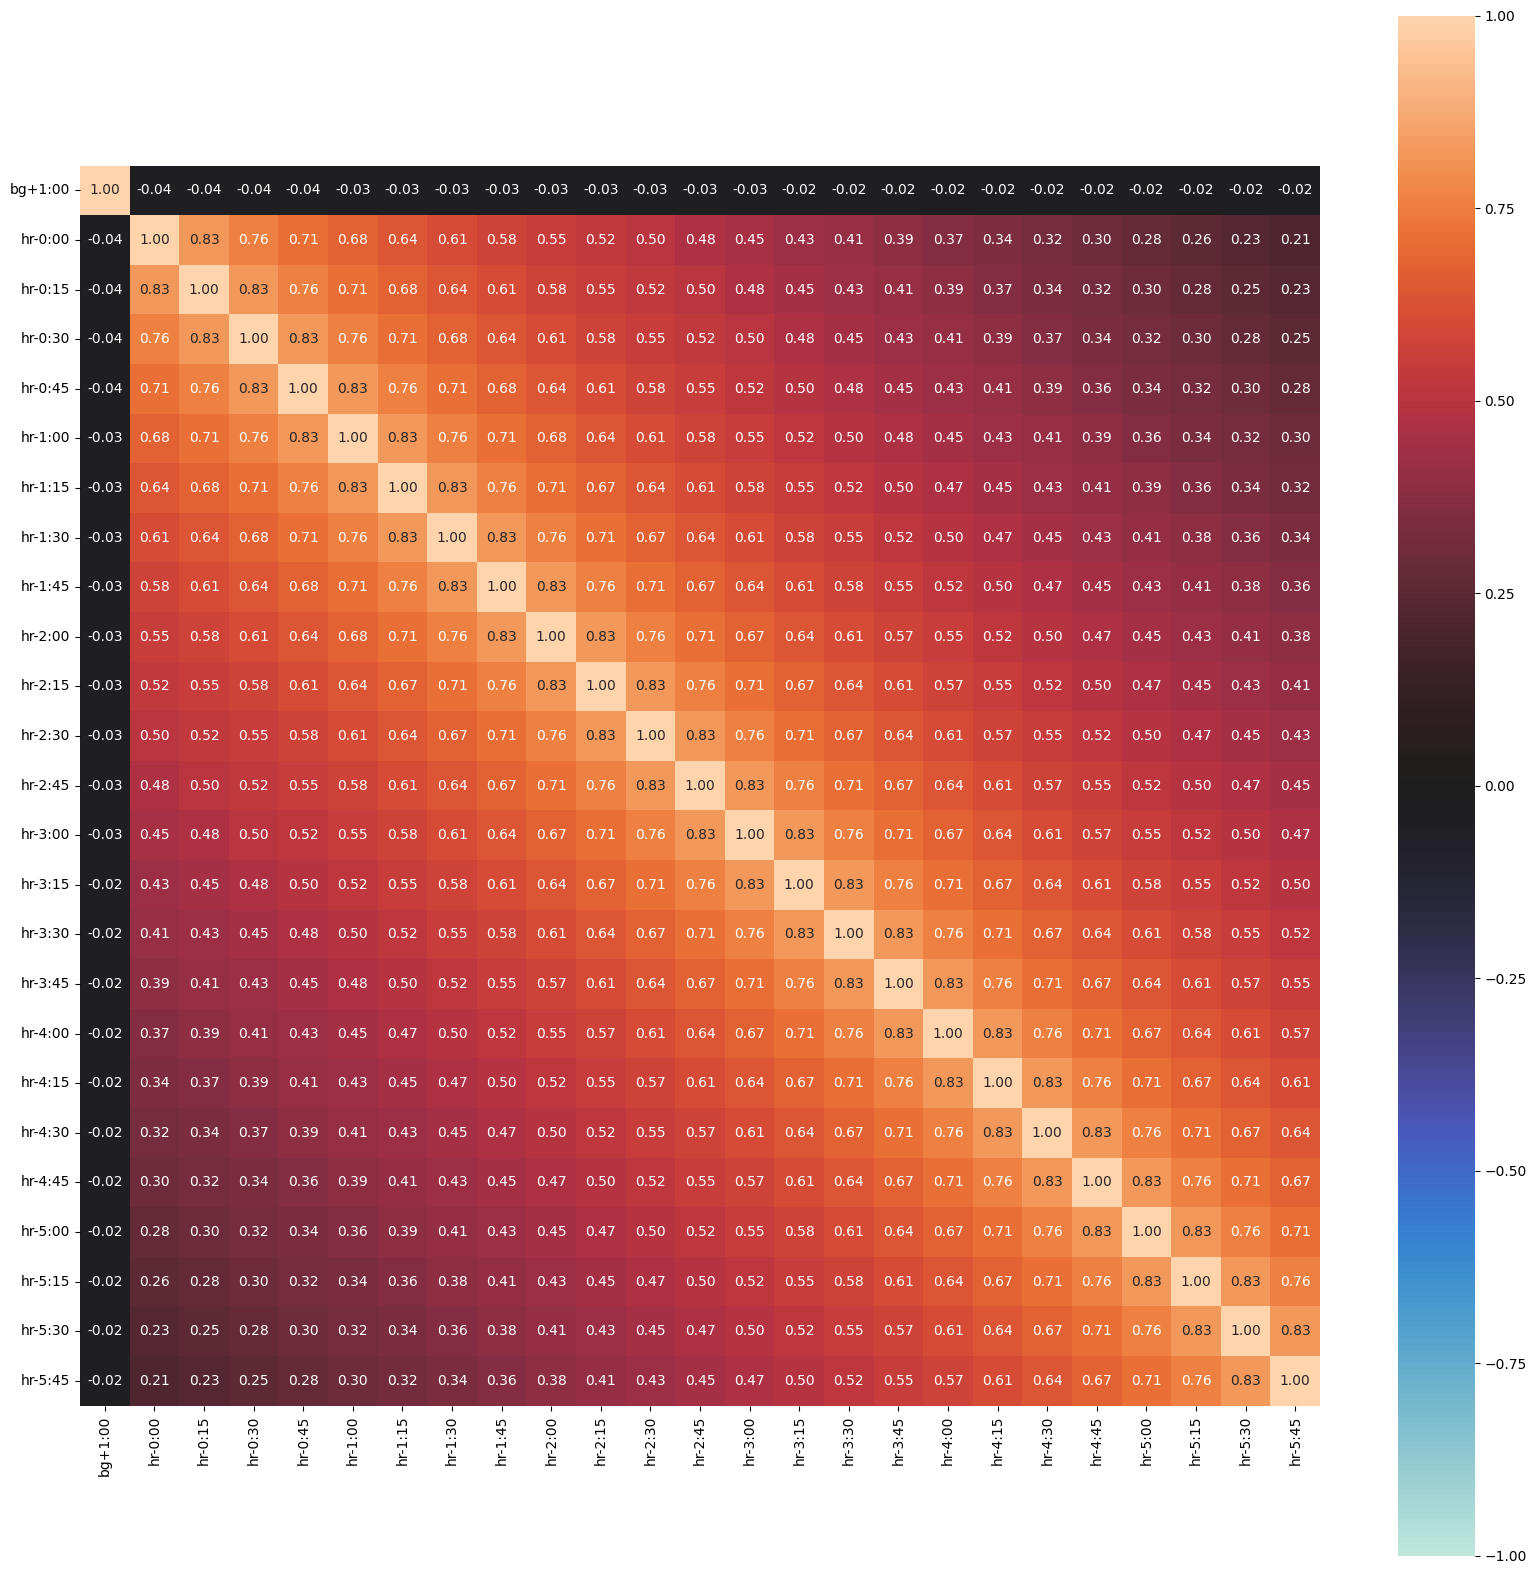

In [28]:
associations = dython.nominal.associations(df_insuline, figsize=(20,20))

<Axes: title={'center': 'bg+1:00 correlations'}>

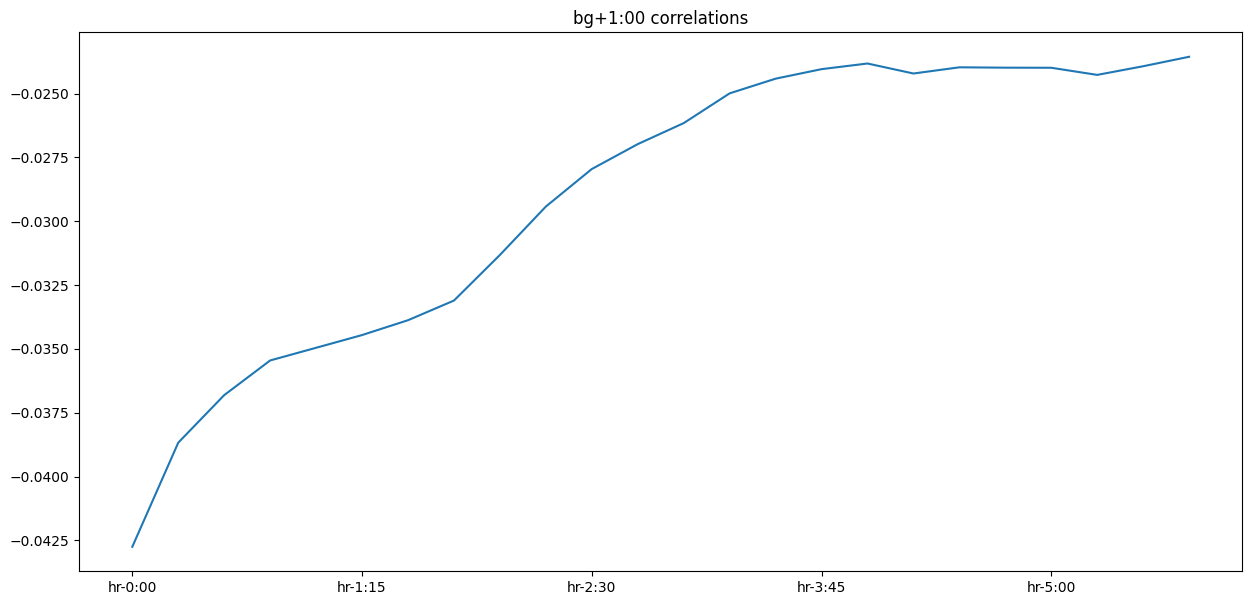

In [29]:
associations["corr"]["bg+1:00"][1:].plot(title="bg+1:00 correlations", figsize=(15,7))

As you can see, the most correlated is the first 2h (+1h) We will drop all other columns for not keeping too much data for the training

In [32]:
df.drop(columns=sorted(filter(lambda x: "hr" in x, df.columns))[9:])

,id,m_num,p_num,time,bg-0:00,bg-0:15,bg-0:30,bg-0:45,bg-1:00,bg-1:15,...,hr-0:00,hr-0:15,hr-0:30,hr-0:45,hr-1:00,hr-1:15,hr-1:30,hr-1:45,hr-2:00,bg+1:00
0,p01_0,0,0,2000-09-18 06:10:00,15.1,16.2,17.3,17.5,17.3,18.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,13.4
1,p01_1,1,0,2000-09-18 06:25:00,14.4,15.1,16.2,17.3,17.5,17.3,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,12.8
2,p01_2,2,0,2000-09-18 06:40:00,13.9,14.4,15.1,16.2,17.3,17.5,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,15.5
3,p01_3,3,0,2000-09-18 06:55:00,13.8,13.9,14.4,15.1,16.2,17.3,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,14.8
4,p01_4,4,0,2000-09-18 07:10:00,13.4,13.8,13.9,14.4,15.1,16.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177019,p12_25294,25294,8,2000-12-18 23:35:00,9.8,8.9,8.2,6.9,6.1,6.4,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,11.1
177020,p12_25295,25295,8,2000-12-18 23:40:00,10.3,9.3,8.7,7.5,6.3,6.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10.9
177021,p12_25296,25296,8,2000-12-18 23:45:00,10.7,9.7,8.6,7.9,6.5,6.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10.7
177022,p12_25297,25297,8,2000-12-18 23:50:00,11.0,9.8,8.9,8.2,6.9,6.1,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10.5


## d) Correlation with carbs

In [33]:
columns = ["bg+1:00"]
columns.extend(sorted(filter(lambda x: "carbs" in x, df.columns)))
df_insuline = df[columns]

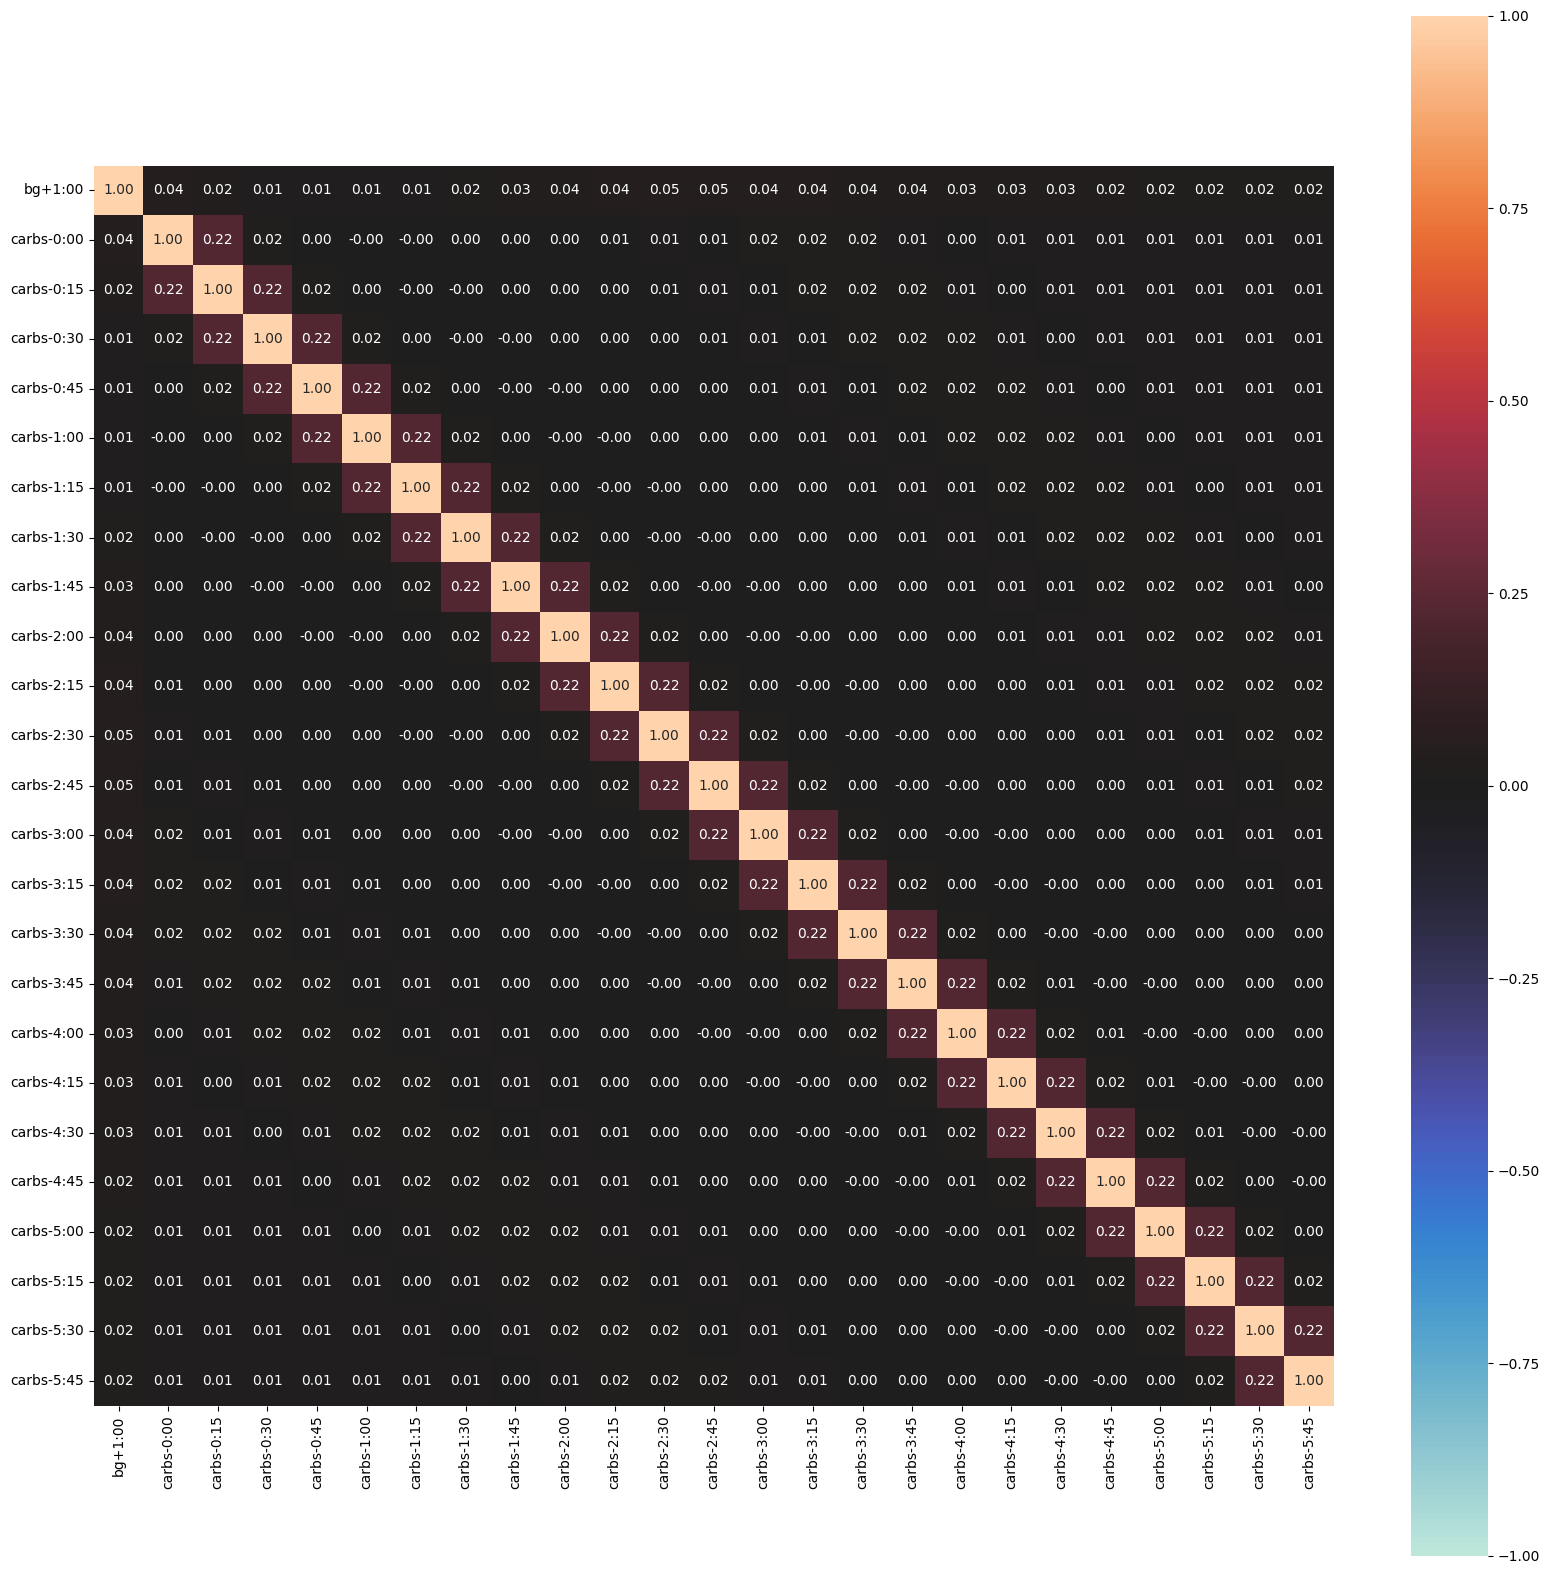

In [34]:
associations = dython.nominal.associations(df_insuline, figsize=(20,20))

<Axes: title={'center': 'bg+1:00 correlations'}>

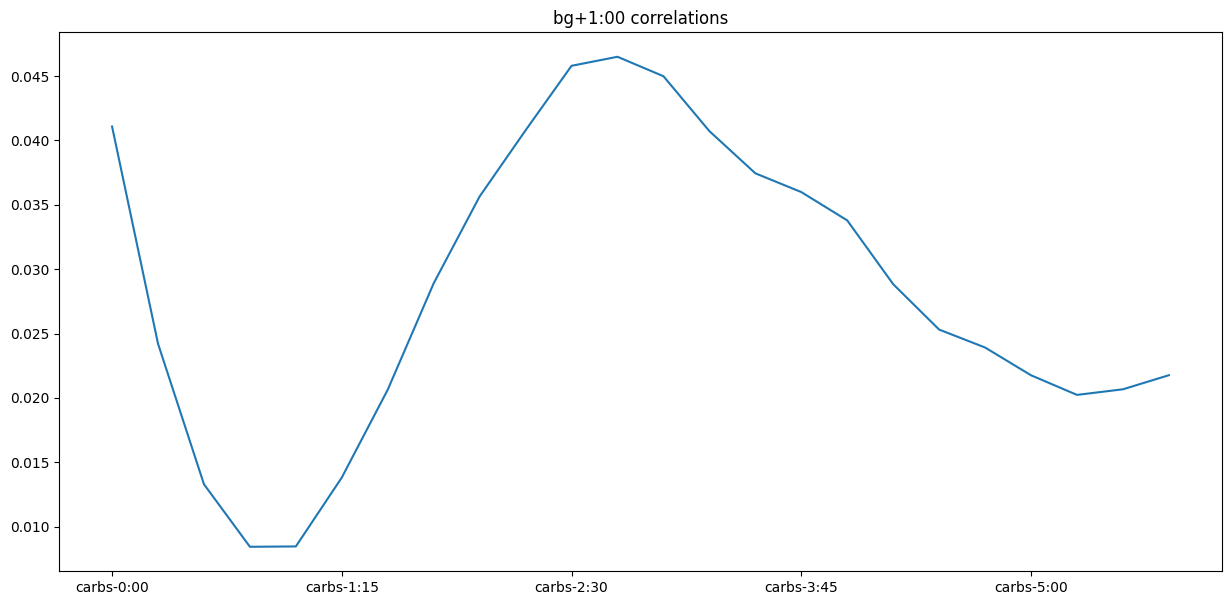

In [35]:
associations["corr"]["bg+1:00"][1:].plot(title="bg+1:00 correlations", figsize=(15,7))

As you can see, the most correlated is the first 1h (+1h) We will drop all other columns for not keeping too much data for the training

In [36]:
df.drop(columns=sorted(filter(lambda x: "insulin" in x, df.columns))[12:])

,id,m_num,p_num,time,bg-0:00,bg-0:15,bg-0:30,bg-0:45,bg-1:00,bg-1:15,...,hr-3:45,hr-4:00,hr-4:15,hr-4:30,hr-4:45,hr-5:00,hr-5:15,hr-5:30,hr-5:45,bg+1:00
0,p01_0,0,0,2000-09-18 06:10:00,15.1,16.2,17.3,17.5,17.3,18.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,13.4
1,p01_1,1,0,2000-09-18 06:25:00,14.4,15.1,16.2,17.3,17.5,17.3,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,12.8
2,p01_2,2,0,2000-09-18 06:40:00,13.9,14.4,15.1,16.2,17.3,17.5,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,15.5
3,p01_3,3,0,2000-09-18 06:55:00,13.8,13.9,14.4,15.1,16.2,17.3,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,14.8
4,p01_4,4,0,2000-09-18 07:10:00,13.4,13.8,13.9,14.4,15.1,16.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177019,p12_25294,25294,8,2000-12-18 23:35:00,9.8,8.9,8.2,6.9,6.1,6.4,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,11.1
177020,p12_25295,25295,8,2000-12-18 23:40:00,10.3,9.3,8.7,7.5,6.3,6.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10.9
177021,p12_25296,25296,8,2000-12-18 23:45:00,10.7,9.7,8.6,7.9,6.5,6.2,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10.7
177022,p12_25297,25297,8,2000-12-18 23:50:00,11.0,9.8,8.9,8.2,6.9,6.1,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10.5


In [ ]:
columns = ["bg+1:00"]
columns.extend(sorted(filter(lambda x: "insulin" in x, df.columns)))
df_insuline = df[columns]

# 2. Save pruned data

In [37]:
import os

if not os.path.exists("dataset/pruned"):
    os.mkdir("dataset/pruned")
    
df.to_csv("dataset/pruned/train.csv", index=False)